<a href="https://colab.research.google.com/github/Ogunfool/Maintenance-Planning-with-reinforcement-learning/blob/main/Environment_Simulations_For_Corrective_Preventive_AndRL-Agent_based_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LET'S BEGIN SIMULATION....


*   Seperate Simulation programs for were created for the three policies below - The major change to the programs are the policies used.
*   A modified planner class helper function named standard_planner_sim() was created for the simulation. It collects info about the number of preventive and corrective maintenance carried out in each iteration.



In [ ]:
# AI-Based Maintenance Planner Environment for Simulation
import numpy as np

# "NM" = No Maintenance, "PM" = Preventive Maintenance
ACTION_SPACE = ('NM', 'PM')

class Planner: # Environment for 3 machines
  def __init__(self, start=(0,0,0)):
    self.s = start

  def set(self, rewards, actions):
    # rewards should be a dict of: ("action"): r ("NM"): reward
    # actions should be a dict of: (int): A (1): list of actions for all 3 machines
    self.rewards = rewards
    self.actions = actions
    # self.PM_counts = PM_counts

  # Use to set next state to current state
  def set_state(self, s):
    self.s = tuple(s)

  def current_state(self):
    return (self.s)

  def is_terminal(self):  #Takes tuple of states for all machines, Returns a boolean tuple
    status = []
    for t in range(3):
      status.append(self.s[t] >= 5)
      
    return(status)

  def is_terminal_single(self, s):  # Takes single machine state, Returns a boolean 
    return s >= 5

  def reset(self):
    # put agent back in start position
    self.s = (0,0,0)
    return (self.s)

  def get_next_state(self,a):
    # This answers: where would I end up if I perform action 'a' in state 's'?
    s_next = [0,0,0]

    for m in range(3):
      # Check if state is terminal
      # When in terminal state, the next state is independent of the action taken
      if self.is_terminal_single(self.s[m]):
        s_next[m] = 0
        # Debugging tool
        print("episode end:", m, self.s[m], s_next[m], a[m])
      else:
        print("Not terminal state:", m, self.s[m], s_next[m], a[m])
      
      if a[m] == "NM":
        if (self.is_terminal_single(self.s[m]) == 0):
          s_next[m] = np.random.choice([self.s[m] + 1, 0], p=[transition_probs[m,self.s[m],a[m]], 1-transition_probs[m,self.s[m],a[m]]])
          # Debugging 
          print("Action is AM:", m, self.s[m], s_next[m], a[m])

      if a[m] == "PM":
        s_next[m] = 0
        # Debugging
        print("action is PM:", m, self.s[m], s_next[m], a[m])
    
    # Set next state as new state
    self.set_state(s_next)
    return s_next

  def act(self, a):
    a_array = np.copy(a)
    reward = np.zeros((3,))
    PM_counts = np.zeros((3,))
    CM_counts = np.zeros((3,))

    # this answers: where would I end up if I perform action 'a' in state 's'?
    s_next = np.zeros((3,))
    for m in range(3):
      # Check if state is terminal
      if self.is_terminal_single(self.s[m]):
        s_next[m] = 0
        a_array[m] = "CM"
        CM_counts[m] = 1

      if a[m] == "NM":
        if (self.is_terminal_single(self.s[m]) == 0):
          s_next[m] = np.random.choice([self.s[m] + 1, 0], p=[transition_probs[m,self.s[m],a[m]], 1-transition_probs[m,self.s[m],a[m]]])
          if s_next[m] == 0:
            a_array[m] = "CM"
            CM_counts[m] = 1
            

      if a[m] == "PM":
        s_next[m] = 0
        PM_counts[m] = 1

      # Collect reward for action taken on each machine
      reward[m] = self.rewards[a_array[m]]

       

    # Set next state as new state
    self.set_state(s_next)
    return reward.sum(), PM_counts, CM_counts

def standard_planner_sim():
  # define a planner that describes the reward for arriving at each state
  # and possible actions at each state
  # s means start position
  g = Planner()
  rewards = {("NM"): 0, ("PM"): -100, ("CM"): -500}
  actions = {
    (0): ('NM', 'NM', 'NM'),
    (1): ('PM', 'PM', 'PM'),
    (2): ('NM', 'NM', 'PM'),
    (3): ('NM', 'PM', 'NM'),
    (4): ('PM', 'NM', 'NM'),
    (5): ('PM', 'PM', 'NM'),
    (6): ('PM', 'NM', 'PM'),
    (7): ('NM', 'PM', 'PM'),
  }
  g.set(rewards, actions)
  return g

In [ ]:
# Q-Learning Simulation / Agent Play
if __name__ == '__main__':
  # planner = standard_planner()
  planner = standard_planner_sim()

  # repeat until convergence
  reward_per_episode = []
  # Create lists to store PMs and CMs/episode: These will be a list of lists (3 machines/episode)
  PM_counts_per_episode = []
  CM_counts_per_episode = []

  for it in range(1000):
    if it % 200 == 0:
      print("it:", it)

    # begin a new episode
    s = planner.reset()
    episode_reward = 0
    episode_PM_counts = np.zeros((3,))
    episode_CM_counts = np.zeros((3,))

    for i in range(100):
      # perform action and get next state + reward
      a = policy[s]
      # print(a)
      r, PM_counts_per_timestep, CM_counts_per_timestep = planner.act(planner.actions[a])
      s2 = planner.current_state()

      # update reward
      episode_reward += r

      # From the envir returns a list of PMs/timestep, which we can update
      # Update PM_counts
      episode_PM_counts += PM_counts_per_timestep 

      episode_CM_counts += CM_counts_per_timestep 

      # next state becomes current state
      s = s2
    
    # log the reward for this episode
    reward_per_episode.append(episode_reward)


    # log PM/s per episode
    PM_counts_per_episode.append(episode_PM_counts)
    CM_counts_per_episode.append(episode_CM_counts)


it: 0
it: 200
it: 400
it: 600
it: 800


In [ ]:
# Periodic Maintenance Simulation
# Policy function
def periodic_policy(i):
  if (((i+1) % 3 == 0) & (i != 0)):
    policy = 1
  else:
    policy = 0
  return policy

if __name__ == '__main__':
  # planner = standard_planner()
  planner = standard_planner_sim()

  # repeat until convergence
  reward_per_episode = []
  # Create lists to store PMs and CMs/episode: These will be a list of lists (3 machines/episode)
  PM_counts_per_episode = []
  CM_counts_per_episode = []

  for it in range(1000):
    if it % 200 == 0:
      print("it:", it)

    # begin a new episode
    s = planner.reset()
    episode_reward = 0
    episode_PM_counts = np.zeros((3,))
    episode_CM_counts = np.zeros((3,))

    for i in range(100):
      # perform action and get next state + reward
      a = periodic_policy(i)
      # print(a)
      r, PM_counts_per_timestep, CM_counts_per_timestep = planner.act(planner.actions[a])
      s2 = planner.current_state()

      # update reward
      episode_reward += r

      # From the envir returns a list of PMs/timestep, which we can update
      # Update PM_counts
      episode_PM_counts += PM_counts_per_timestep 

      episode_CM_counts += CM_counts_per_timestep 

      # next state becomes current state
      s = s2
    
    # log the reward for this episode
    reward_per_episode.append(episode_reward)


    # log PM/s per episode
    PM_counts_per_episode.append(episode_PM_counts)
    CM_counts_per_episode.append(episode_CM_counts)


it: 0
it: 200
it: 400
it: 600
it: 800


In [ ]:
# Corrective Maintenance Policy
if __name__ == '__main__':
  # planner = standard_planner()
  planner = standard_planner_sim()

  # repeat until convergence
  reward_per_episode = []
  # Create lists to store PMs and CMs/episode: These will be a list of lists (3 machines/episode)
  PM_counts_per_episode = []
  CM_counts_per_episode = []

  for it in range(1000):
    if it % 200 == 0:
      print("it:", it)

    # begin a new episode
    s = planner.reset()
    episode_reward = 0
    episode_PM_counts = np.zeros((3,))
    episode_CM_counts = np.zeros((3,))

    for i in range(100):
      # perform action and get next state + reward
      a = 0
      r, PM_counts_per_timestep, CM_counts_per_timestep = planner.act(planner.actions[a])
      s2 = planner.current_state()

      # update reward
      episode_reward += r

      # From the envir returns a list of PMs/timestep, which we can update
      # Update PM_counts
      episode_PM_counts += PM_counts_per_timestep 

      episode_CM_counts += CM_counts_per_timestep 

      # next state becomes current state
      s = s2
    
    # log the reward for this episode
    reward_per_episode.append(episode_reward)


    # log PM/s per episode
    PM_counts_per_episode.append(episode_PM_counts)
    CM_counts_per_episode.append(episode_CM_counts)


it: 0
it: 200
it: 400
it: 600
it: 800


Collect relevant Info from simulation

In [ ]:
maintenance_cost_per_episode = -np.array(reward_per_episode)

In [ ]:
maintenance_cost_per_episode

In [ ]:
reward_per_episode = np.array(reward_per_episode)

In [ ]:
reward_per_episode

In [ ]:
PM_counts_per_episode = np.array(PM_counts_per_episode)

In [ ]:
PM_counts_per_episode

In [ ]:
CM_counts_per_episode = np.array(CM_counts_per_episode)

In [ ]:
CM_counts_per_episode

In [ ]:
average_maintenance_cost = np.mean(maintenance_cost_per_episode)

In [ ]:
average_maintenance_cost

In [ ]:
average_CM_counts_per_machine = np.mean(np.array(CM_counts_per_episode), axis=0)

In [ ]:
average_CM_counts_per_machine

array([0., 0., 0.])

In [ ]:
average_PM_counts_per_machine = np.mean(np.array(PM_counts_per_episode), axis=0)
average_PM_counts_per_machine

array([50., 50., 50.])

Save Info

In [ ]:
np.savetxt('RL-maintenance-sim-PM-counts-per-episode', PM_counts_per_episode, fmt='%s', delimiter = ',')

In [ ]:
np.savetxt('RL-maintenance-sim-CM-counts-per-episode', CM_counts_per_episode, fmt='%s', delimiter = ',')

In [ ]:
np.savetxt('RL-maintenance-sim-reward-per-episode', reward_per_episode, fmt='%s', delimiter = ',')

In [ ]:
np.savetxt('RL-maintenance-sim-cost-per-episode', maintenance_cost_per_episode, fmt='%s', delimiter = ',')

In [ ]:
np.savetxt('RL-maintenance-sim-cumresults', (average_maintenance_cost, average_CM_counts_per_machine, average_PM_counts_per_machine), fmt='%s', delimiter = ',' )

Let's Plot some figures - total maintenance cost per episode for all three(3) policies

In [ ]:
RL_cost_per_episode = -np.array(reward_per_episode)

In [ ]:
periodic_cost_per_episode = -np.array(reward_per_episode)

In [ ]:
corrective_cost_per_episode = -np.array(reward_per_episode)

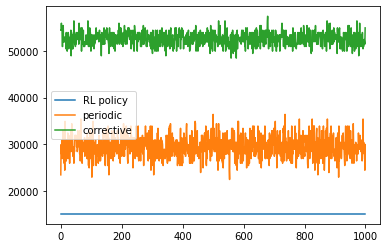

In [ ]:
plt.plot(RL_cost_per_episode, label='RL policy')
plt.plot(periodic_cost_per_episode, label = 'periodic')
plt.plot(corrective_cost_per_episode, label = 'corrective')
# plt.title("maintenance cost per episode")
# plt.xlabel('episode')
# plt.ylabel('costs')
plt.legend()
plt.savefig('maintenancecosts-per-episode.png', dpi=200)